## Load the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
data = pd.read_csv('Movie_classification.csv')
data

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,NO,186.96,243.584,Action,27,561,44800,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,YES,132.24,263.296,Action,20,600,41200,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,NO,109.56,243.824,Comedy,31,576,47800,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,YES,158.80,303.520,Comedy,47,607,44000,0


## Data Processing

In [5]:
data.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [7]:
## Filling missing values

data['Time_taken'] = data['Time_taken'].fillna(150)
data.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

## Encoding the 3D_available variable and Genre column

In [8]:
data = pd.get_dummies(data, columns = ['3D_available', 'Genre'])
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_NO,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,23,494,48000,1,0,1,0,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,42,462,43200,0,1,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,38,458,69400,1,1,0,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,45,472,66800,1,0,1,0,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,55,395,72400,1,1,0,0,0,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

## Seperate X and y

In [10]:
X = data.drop('Start_Tech_Oscar', axis = 1)
y = data['Start_Tech_Oscar']

## Split the data into train test split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 0)

## Apply Decision Tree Classifier on X_train and y_train

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()   ## default critrion used is gini index
dtc

DecisionTreeClassifier()

In [14]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Perform predictions

In [16]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)

## perform Evaluation 

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5986842105263158

## Plot the tree

[Text(0.33963815789473684, 0.9666666666666667, 'Budget <= 30549.723\ngini = 0.498\nsamples = 354\nvalue = [167, 187]'),
 Text(0.06237816764132553, 0.9, 'Marketing expense <= 24.613\ngini = 0.185\nsamples = 29\nvalue = [3, 26]'),
 Text(0.031189083820662766, 0.8333333333333334, 'Collection <= 23300.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.015594541910331383, 0.7666666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.04678362573099415, 0.7666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0935672514619883, 0.8333333333333334, 'Lead_ Actor_Rating <= 9.268\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.07797270955165692, 0.7666666666666667, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.10916179337231968, 0.7666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6168981481481481, 0.9, 'Collection <= 63100.0\ngini = 0.5\nsamples = 325\nvalue = [164, 161]'),
 Text(0.27278265107212474, 0.8333333333333334, 'Producer_rat

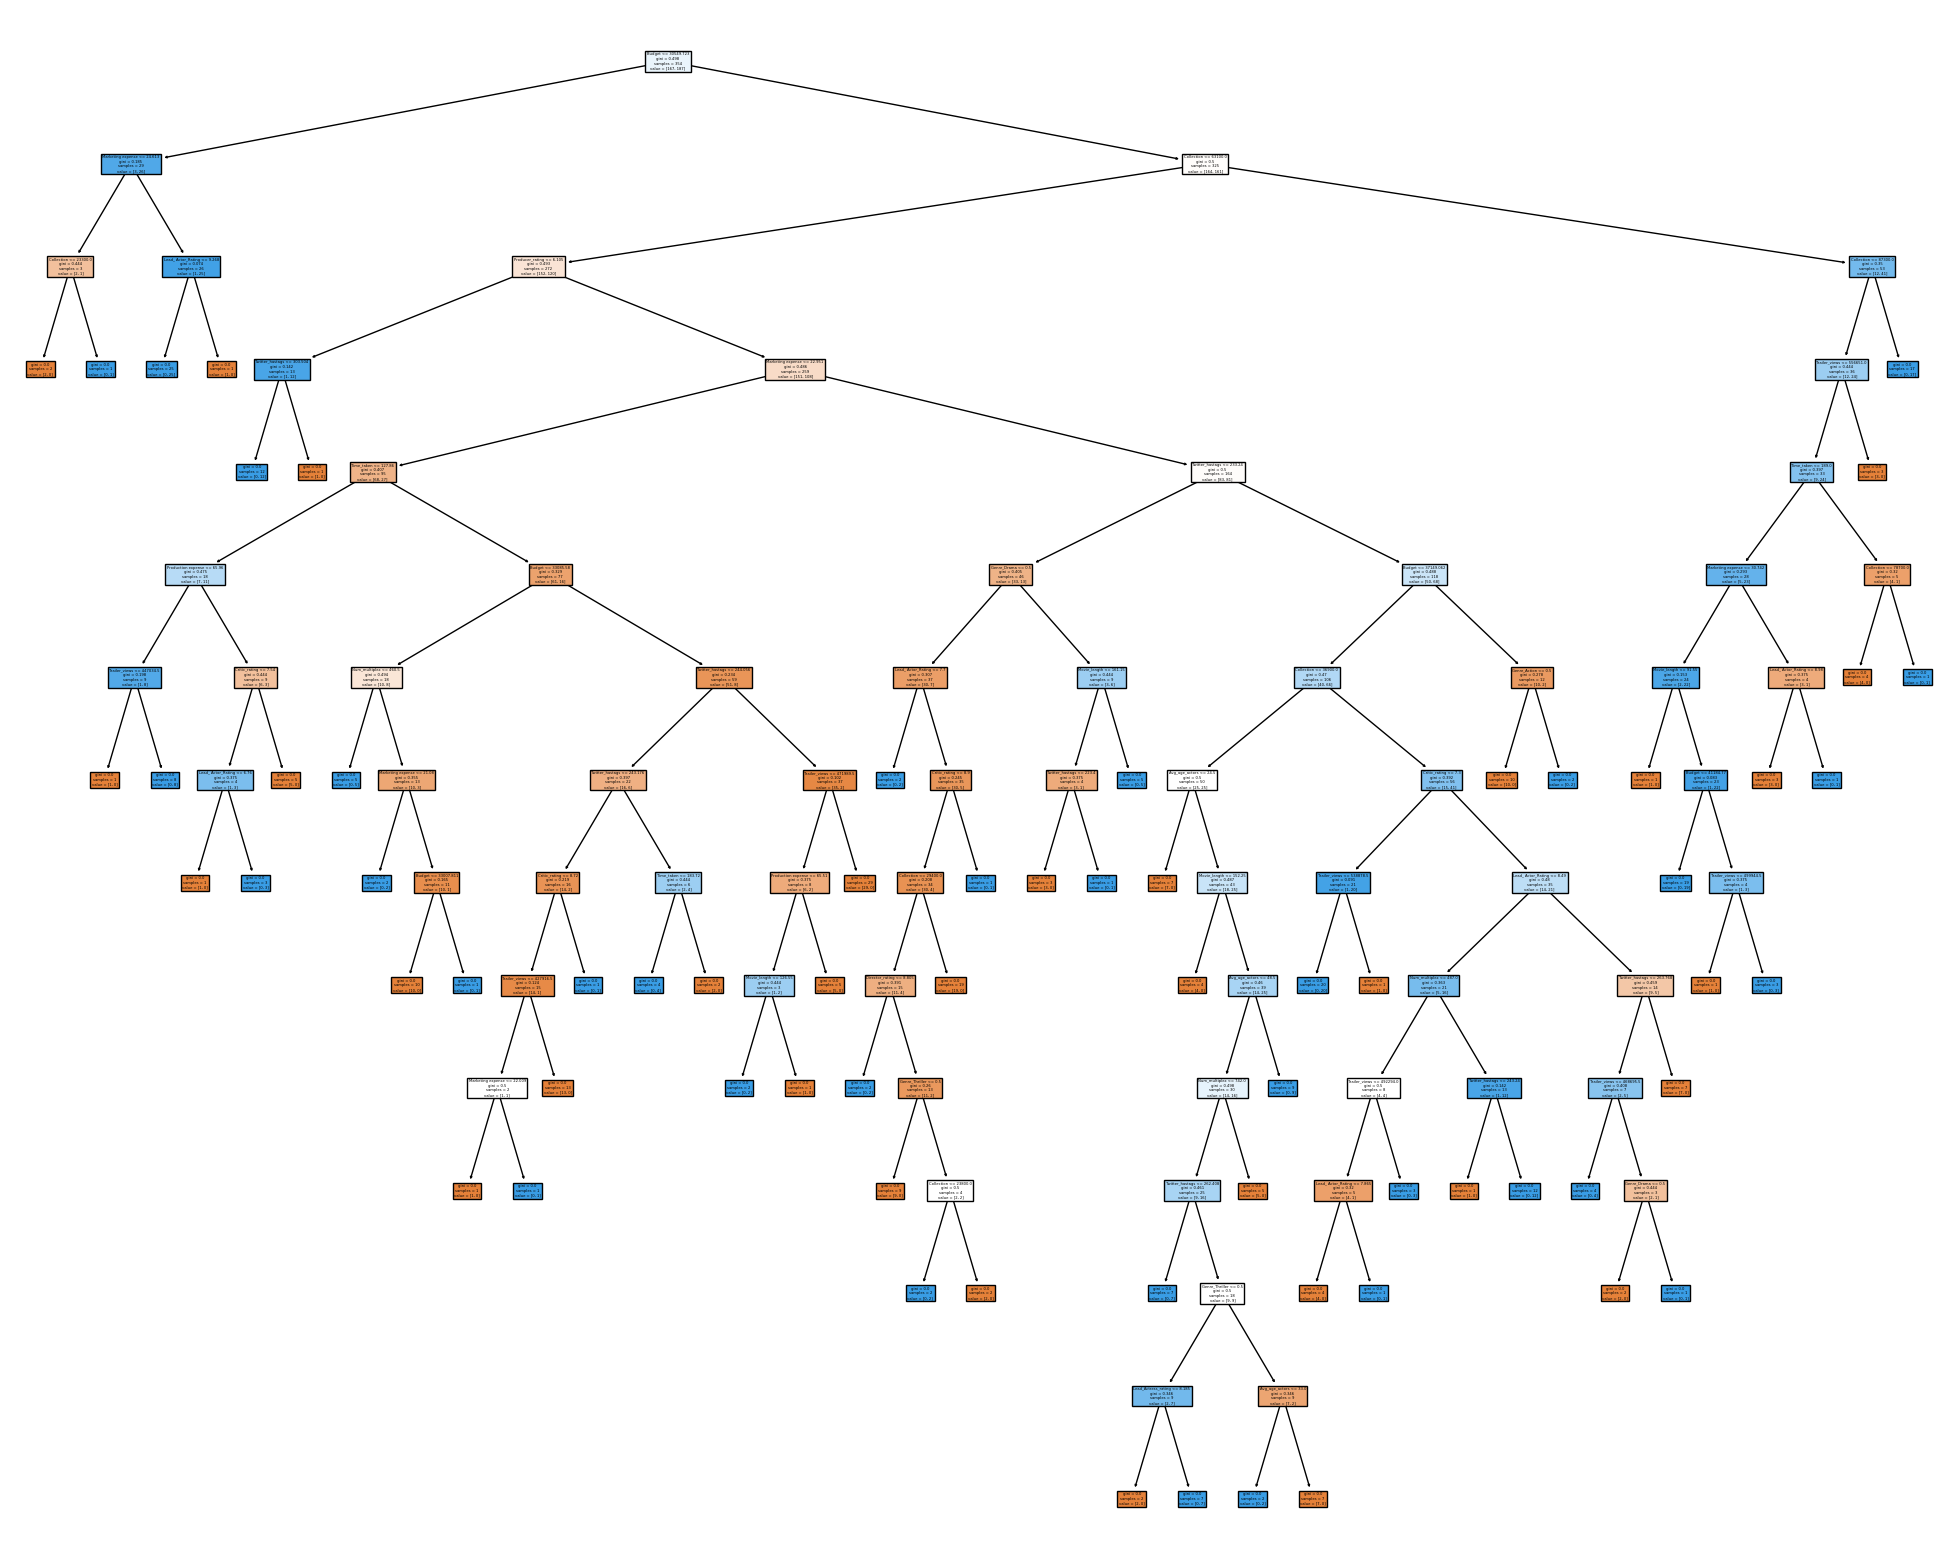

In [20]:
## Set the figure size
fig = plt.figure(figsize = (25, 20))

## plot the tree
from sklearn.tree import plot_tree
plot_tree(dtc, feature_names = X.columns, filled = True)

## Use the max_depth parameter in Decision Tree Classifier to control tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc_md = DecisionTreeClassifier(max_depth = 3)
dtc_md

DecisionTreeClassifier(max_depth=3)

In [26]:
dtc_md.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
dtc_md.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

[Text(0.5, 0.875, 'Budget <= 30549.723\ngini = 0.498\nsamples = 354\nvalue = [167, 187]'),
 Text(0.25, 0.625, 'Marketing expense <= 24.613\ngini = 0.185\nsamples = 29\nvalue = [3, 26]'),
 Text(0.125, 0.375, 'Num_multiplex <= 616.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.375, 'Lead_ Actor_Rating <= 9.268\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.625, 'Collection <= 63100.0\ngini = 0.5\nsamples = 325\nvalue = [164, 161]'),
 Text(0.625, 0.375, 'Producer_rating <= 6.105\ngini = 0.493\nsamples = 272\nvalue = [152, 120]'),
 Text(0.5625, 0.125, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.6875, 0.125, 'gini = 0.486\nsamples = 259\nvalue = [151, 108]'),
 Text(0.875, 0.375, 'Collection 

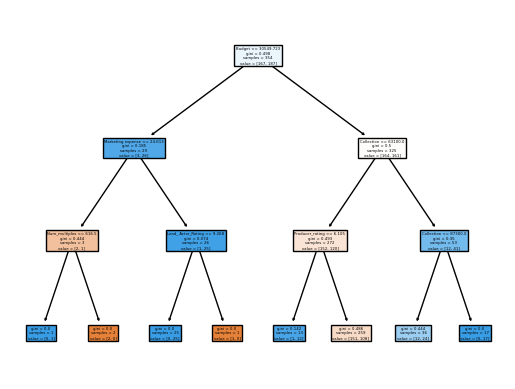

In [28]:
from sklearn.tree import plot_tree
plot_tree(dtc_md, feature_names = X.columns, filled = True)

## Note:

1. max_depth is a hyperparameter(if you change this the accuracy of Decision Tree will vary).
2. max_depth can also be considered in Hyperparameter tuning

## min_samples_split

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc_mss = DecisionTreeClassifier(min_samples_split = 10)
dtc_mss

DecisionTreeClassifier(min_samples_split=10)

In [30]:
dtc_mss.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)

In [31]:
dtc_mss.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)

[Text(0.3256708115183246, 0.9642857142857143, 'Budget <= 30549.723\ngini = 0.498\nsamples = 354\nvalue = [167, 187]'),
 Text(0.041884816753926704, 0.8928571428571429, 'Marketing expense <= 24.613\ngini = 0.185\nsamples = 29\nvalue = [3, 26]'),
 Text(0.020942408376963352, 0.8214285714285714, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.06282722513089005, 0.8214285714285714, 'Lead_ Actor_Rating <= 9.268\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.041884816753926704, 0.75, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.08376963350785341, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6094568062827225, 0.8928571428571429, 'Collection <= 63100.0\ngini = 0.5\nsamples = 325\nvalue = [164, 161]'),
 Text(0.26079842931937175, 0.8214285714285714, 'Producer_rating <= 6.105\ngini = 0.493\nsamples = 272\nvalue = [152, 120]'),
 Text(0.1256544502617801, 0.75, 'Twitter_hastags <= 303.504\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.10471204188481675, 0.

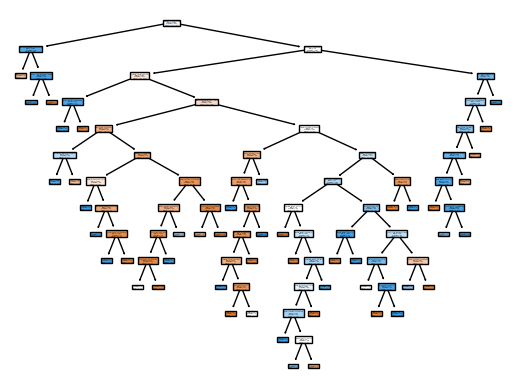

In [32]:
from sklearn.tree import plot_tree
plot_tree(dtc_mss, feature_names = X.columns, filled = True)

## Note:

1. min_samples_split is a hyper parameter(if i change this then accuracy will vary)
2. To figure out the exact min_samples_split value perform Hyperparameter tuning using GridSearchCV